---
<center><h1>Caloriees Burnt Prediction Prediction</h1></center>
<center><h3>Part of 30 Days 30 ML Projects Challenge</h3></center>

---

## 1) Understanding Problem Statement
---

In today's health-conscious society, monitoring and managing calorie expenditure is a key aspect of maintaining a healthy lifestyle. Understanding how various activities and individual factors impact calorie burn is crucial for individuals striving to achieve fitness goals. Leveraging the capabilities of data science, we aim to address this health and wellness challenge.

This project falls within the domain of **Regression Machine Learning Problem**. The primary objective is **to develop a predictive model for calorie burnt prediction**. By analyzing a combination of input features such as physical activity type, duration, intensity, and individual characteristics like age, weight, and gender, the goal is to create a model that accurately estimates the number of calories burnt during a specific activity. This predictive model can empower individuals, fitness enthusiasts, and healthcare professionals with valuable insights to optimize their calorie management and physical activity planning.

## 2) Understanding Data
---

The project uses **Calories Data** which contains several variables (independent variables) and one outcome variable (dependent variable).

## 3) Getting System Ready
---
Importing required libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

## 4) Data Eyeballing
---

### Laoding Data

In [2]:
calories = pd.read_csv('Datasets/Day16_Calories_Data1.csv') 

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
exercise = pd.read_csv('Datasets/Day16_Calories_Data2.csv') 

In [5]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


### Concatenating both dataframes

In [6]:
calories_data = pd.concat([exercise,calories['Calories']], axis=1)

In [7]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
print('The size of Dataframe is: ', calories_data.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
calories_data.info()
print('-'*100)

The size of Dataframe is:  (15000, 9)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
----------------------------------------------------------------------------------------------------


In [9]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in calories_data.columns if calories_data[feature].dtype != 'O']
categorical_features = [feature for feature in calories_data.columns if calories_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

We have 1 categorical features : ['Gender']


In [10]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=calories_data.isnull().sum().sort_values(ascending=False)
percent=(calories_data.isnull().sum()/calories_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
User_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
Duration,0,0.0
Heart_Rate,0,0.0
Body_Temp,0,0.0
Calories,0,0.0


In [11]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
calories_data.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
calories_data.describe(include='object').T

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
Gender,15000,2,female,7553


## 5) Data Cleaning & Preprocessing
---

### Data Visualization

#### Gender Distribution

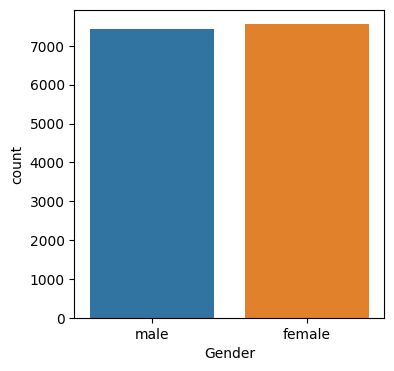

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x= 'Gender', data= calories_data)
plt.show()

#### Age Distribution

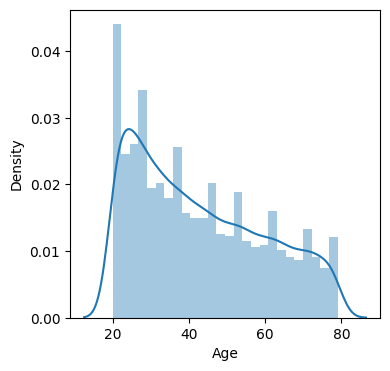

In [14]:
plt.figure(figsize=(4,4))
sns.distplot(calories_data['Age'])
plt.show()

#### Height Distribution

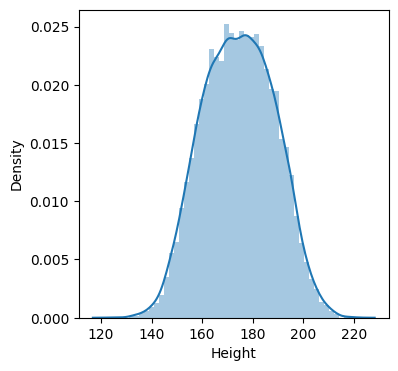

In [15]:
plt.figure(figsize=(4,4))
sns.distplot(calories_data['Height'])
plt.show()

#### Weight Distribution

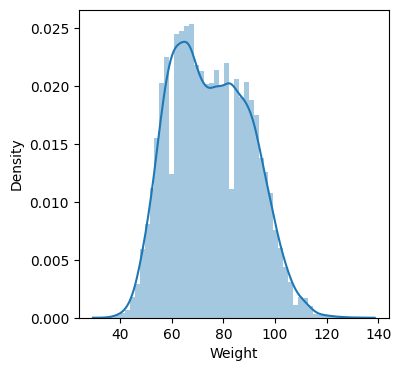

In [16]:
plt.figure(figsize=(4,4))
sns.distplot(calories_data['Weight'])
plt.show()

#### Heatmap to understand Correlation

In [17]:
correlation = calories_data.corr(numeric_only=True)

<Axes: >

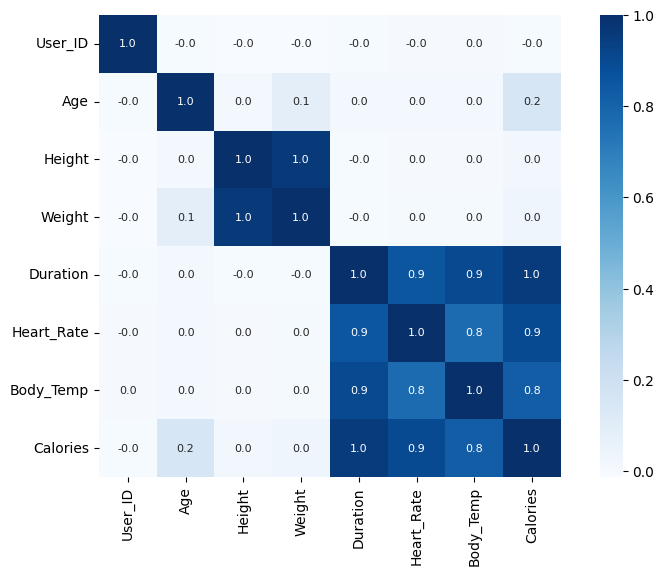

In [18]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


### Encoding the Categorical Features

In [19]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [20]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


## 6) Model Building
---

### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [21]:
# separating the data and labels
X = calories_data.drop(columns = ['User_ID','Calories'], axis=1) # Feature matrix
y = calories_data['Calories'] # Target variable

In [22]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [23]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

### Data Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [26]:
standardized_data = scaler.transform(X)

In [27]:
standardized_data

array([[-1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [ 0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [-1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [ 0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [-1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [-1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

In [28]:
X = standardized_data

In [29]:
X

array([[-1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [ 0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [-1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [ 0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [-1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [-1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

### Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [32]:
print(y.shape, y_train.shape, y_test.shape)

(15000,) (12000,) (3000,)


### Model Comparison : Training & Evaluation

In [33]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [35]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,8.272389,125.390475,11.197789,0.967390
Lasso,9.094562,150.833545,12.281431,0.960773
Ridge,8.272578,125.401244,11.198270,0.967387
SVR,2.248260,29.640191,5.444281,0.992291
Decision Tree Regressor,3.366667,26.203333,5.118919,0.993185
Random Forest Regressor,1.696080,6.991670,2.644177,0.998182


### Inference

The evaluation of various machine learning models for calorie expenditure prediction yields insightful findings:

1. **Accuracy**: All models demonstrate high predictive accuracy, with R-squared (R2) values exceeding 0.96 for all models. This suggests that they effectively capture the variation in calorie burn data, indicating their suitability for the task.

2. **Error Metrics**: The Random Forest Regressor outperforms other models in terms of Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating its ability to make calorie burn predictions with the smallest errors. This signifies its superior precision in estimating calorie expenditure.

3. **Generalization**: The Support Vector Regressor (SVR) and Decision Tree Regressor also perform exceptionally well, demonstrating low errors and high R-squared values. These models exhibit strong generalization capabilities and are adept at capturing underlying patterns in the data.

In summary, all models provide accurate calorie expenditure predictions, with the Random Forest Regressor showing a slight edge in terms of precision. The choice of model may depend on specific requirements, but overall, these models are well-suited for estimating calorie burn based on the provided features.